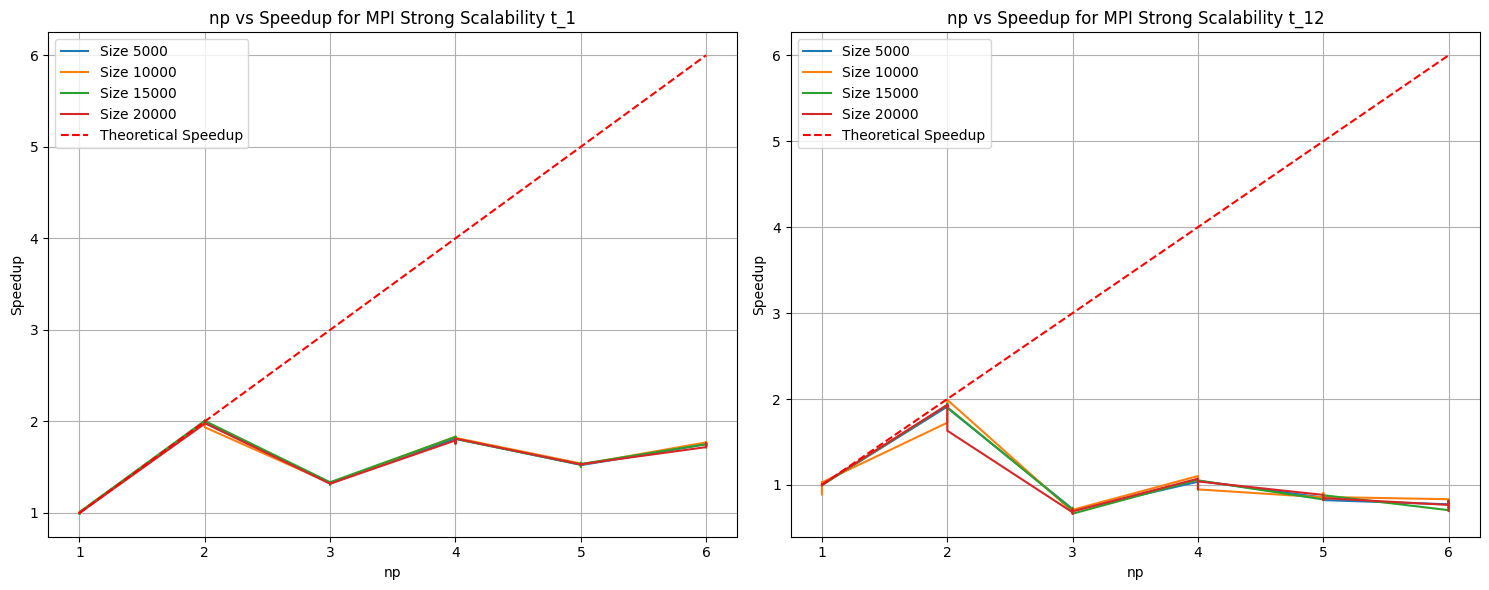

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import re

# Definire la funzione per leggere i dati dai file e calcolare lo speedup
def read_and_process_data(file_path):
    data = pd.read_csv(file_path, sep="\s+", header=None, names=["Size", "np", "Time", "Threads"])
    # Rimuovere le righe non valide
    data = data[pd.to_numeric(data["Time"], errors='coerce').notnull()]
    data["Time"] = data["Time"].astype(float)
    data["np"] = data["np"].astype(int)
    
    T1 = data[data["np"] == 1]["Time"].mean()
    data["Speedup"] = T1 / data["Time"]
    return data

# Funzione per estrarre la dimensione dal nome del file
def extract_size(file_name):
    match = re.search(r'_s_(\d+)', file_name)
    if match:
        return int(match.group(1))
    return float('inf')  # Ritorna un valore molto grande se non riesce a estrarre la dimensione

# Lista dei file
file_pattern_1 = "mpi_strong_scalability_t_1_s_*.txt"
file_pattern_12 = "mpi_strong_scalability_t_12_s_*.txt"
file_list_1 = sorted(glob.glob(file_pattern_1), key=extract_size)
file_list_12 = sorted(glob.glob(file_pattern_12), key=extract_size)

# Configurazione del plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot per mpi_strong_scalability_t_1_s_*.txt
for file in file_list_1:
    data = read_and_process_data(file)
    size_label = extract_size(file)
    axs[0].plot(data["np"], data["Speedup"], label=f'Size {size_label}')

# Plot theoretical speedup per t_1
max_np_1 = max(data["np"].max() for data in map(read_and_process_data, file_list_1))
axs[0].plot(range(1, max_np_1 + 1), range(1, max_np_1 + 1), 'r--', label='Theoretical Speedup')

axs[0].set_title('np vs Speedup for MPI Strong Scalability t_1')
axs[0].set_xlabel('np')
axs[0].set_ylabel('Speedup')
axs[0].grid(True)
axs[0].legend()

# Plot per mpi_strong_scalability_t_12_s_*.txt
for file in file_list_12:
    data = read_and_process_data(file)
    size_label = extract_size(file)
    axs[1].plot(data["np"], data["Speedup"], label=f'Size {size_label}')

# Plot theoretical speedup per t_12
max_np_12 = max(data["np"].max() for data in map(read_and_process_data, file_list_12))
axs[1].plot(range(1, max_np_12 + 1), range(1, max_np_12 + 1), 'r--', label='Theoretical Speedup')

axs[1].set_title('np vs Speedup for MPI Strong Scalability t_12')
axs[1].set_xlabel('np')
axs[1].set_ylabel('Speedup')
axs[1].grid(True)
axs[1].legend()

# Adattare il layout
plt.tight_layout()

# Salvare il grafico risultante
plt.savefig("mpi_strong_scalability_plots.png")
plt.show()
